This is a tiny project to visualize teams positions over rounds on championships.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to draw rectangles on graphs

Half of my project is about the function below, with it I create a list of positions through rounds for each team. For this I create a table and update it after each round, getting all teams positions.

In [2]:
def getPositionsOverTime(data, show_final_table=False, show_specific_round=None):
    def updatePositions():
        table.sort_values(['P', 'J', 'V', 'D', 'SG', 'GP', 'GC'], ascending=[0, 1, 0, 1, 0, 0, 1], inplace=True)
        table['#'] = [i+1 for i in range(20)]
        for team, row in table.iterrows():
            positions[team].append(row['#'])
        
    columns = ['P', 'J', 'V', 'E', 'D', 'GP', 'GC', 'SG', '#']
    index = data['home_team'].unique()
    
    table = pd.DataFrame(columns=columns, index=index)
    table.fillna(0, inplace=True)
    
    data.sort_values('round', inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    keys = index.tolist()
    values = [[] for _ in range(20)]
    positions = dict(zip(keys, values))
    
    last_round = 1
    for _, row in data.iterrows():
        if row['round'] > last_round:
            updatePositions()
            
            if show_specific_round and last_round == show_specific_round and row['round'] > show_specific_round:
                print(table)
            
            last_round = row['round']
        
        table.at[row['home_team'], 'J'] += 1
        table.at[row['home_team'], 'GP'] += row['home_score']
        table.at[row['home_team'], 'GC'] += row['away_score']
        table.at[row['home_team'], 'SG'] += row['home_score'] - row['away_score']
        
        table.at[row['away_team'], 'J'] += 1
        table.at[row['away_team'], 'GP'] += row['away_score']
        table.at[row['away_team'], 'GC'] += row['home_score']
        table.at[row['away_team'], 'SG'] += row['away_score'] - row['home_score']
        
        if row['home_score'] > row['away_score']:
            table.at[row['home_team'], 'P'] += 3
            table.at[row['home_team'], 'V'] += 1
            table.at[row['home_team'], 'D'] += 1
        
        elif row['home_score'] < row['away_score']:
            table.at[row['away_team'], 'P'] += 3
            table.at[row['away_team'], 'V'] += 1
            table.at[row['home_team'], 'D'] += 1
            
        else:
            table.at[row['home_team'], 'P'] += 1
            table.at[row['away_team'], 'P'] += 1
            table.at[row['home_team'], 'E'] += 1
            table.at[row['away_team'], 'E'] += 1
    
    updatePositions()
    
    if not show_specific_round and show_final_table:
        print(table)
        
    return positions

I am going to use matches from my good and old Campeonato Brasileiro 2020 for the visualizations.

In [3]:
df = pd.read_csv('data/champ-br-2020-matches.csv')
df.head()

,round,date,home_team,home_score,away_score,away_team
0,1,2020-08-08,Fortaleza,0,2,Athletico-PR
1,1,2020-08-08,Coritiba,0,1,Internacional
2,1,2020-08-08,Sport Recife,3,2,Ceará
3,1,2020-08-09,Flamengo,0,1,Atl. Mineiro
4,1,2020-08-09,Santos,1,1,RB Bragantino


In [4]:
positions = getPositionsOverTime(df, show_final_table=True)

                P   J   V   E   D  GP  GC  SG   #
Flamengo       71  38  21   8  15  68  48  20   1
Internacional  70  38  20  10  14  61  35  26   2
Atl. Mineiro   68  38  20   8  15  64  45  19   3
São Paulo      66  38  18  12  12  59  41  18   4
Fluminense     64  38  18  10  14  55  42  13   5
Grêmio         59  38  14  17  13  53  40  13   6
Palmeiras      58  38  15  13  11  51  37  14   7
Santos         54  38  14  12  12  52  51   1   8
Athletico-PR   53  38  15   8  14  38  36   2   9
RB Bragantino  53  38  13  14  14  50  40  10  10
Ceará          52  38  14  10  14  54  51   3  11
Corinthians    51  38  13  12  12  45  45   0  12
Atlético GO    50  38  12  14  10  40  45  -5  13
Bahia          44  38  12   8  17  48  59 -11  14
Sport Recife   42  38  12   6  17  31  50 -19  15
Fortaleza      41  38  10  11  13  34  44 -10  16
Vasco          41  38  10  11  14  37  56 -19  17
Goiás          37  38   9  10  14  41  63 -22  18
Coritiba       31  38   7  10  13  31  54 -23  19


The other half of this project is the `plotPositions`, with it I just use the `positions` dictionary resulted from the previous function and specify the teams to show their positions.

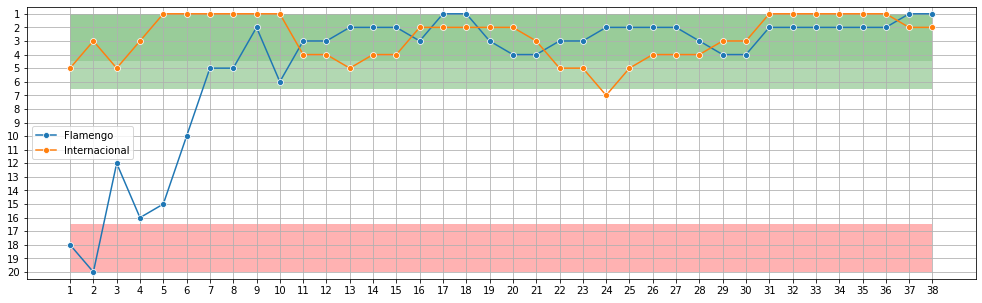

In [75]:
def plotPositions(positions, teams):
    plt.figure(figsize=(17, 5))

    rounds = [i for i in range(1, 39)]
    for team in teams:
        sns.lineplot(x=rounds, y=positions[team], marker='o', label=team);
    
    plt.legend(loc=6)
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.yticks([i for i in range(1, 21)]);
    plt.xticks(rounds);
    plt.ylim(20.5, 0.5)
    
    rectangles = [[1, 16.5, 37, 3.5], [1, 1, 37, 3.5], [1, 4.5, 37, 2]]
    colors = [('red', 0.3), ('green', 0.4), ('green', 0.3)]
    
    for rect, color in zip(rectangles, colors):
        r = mpatches.Rectangle((rect[0], rect[1]), rect[2], rect[3], facecolor=color[0], alpha=color[1])
        plt.gca().add_patch(r)

plotPositions(positions, ['Flamengo', 'Internacional'])

I also added some markers on graph that shows the positions that classifies to Libertadores (the first six) and relegation zone (the last four). 

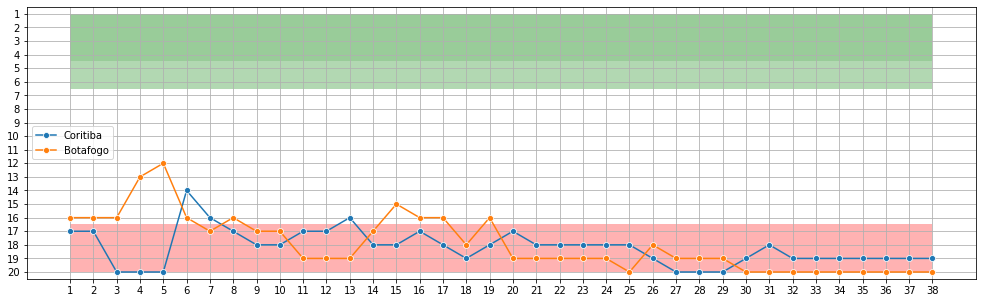

In [76]:
plotPositions(positions, ['Coritiba', 'Botafogo'])

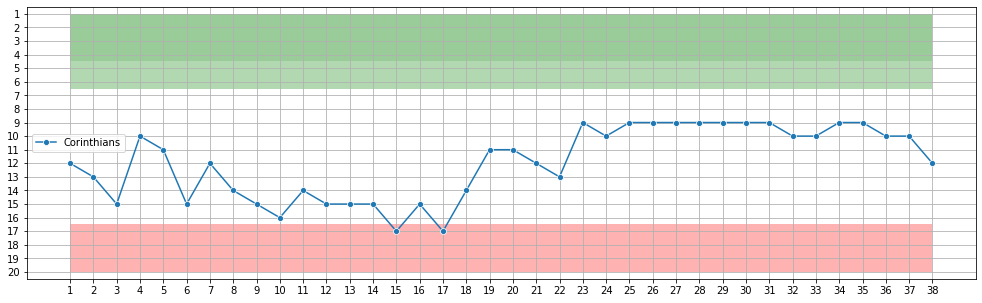

In [67]:
plotPositions(positions, ['Corinthians'])

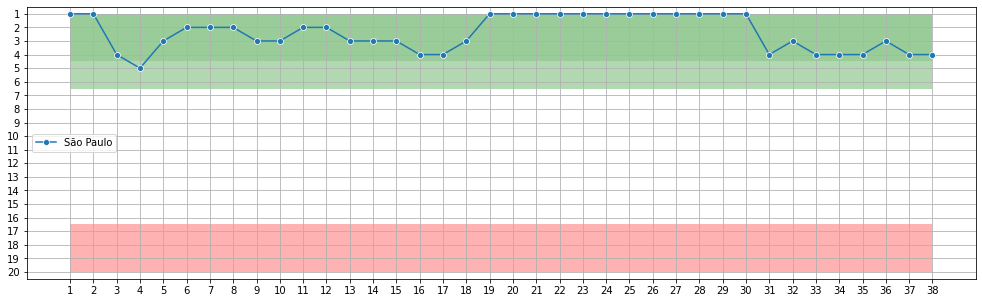

In [69]:
plotPositions(positions, ['São Paulo'])